In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Africa_climate_change.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450951 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     450951 non-null  object 
 1   PRCP     450951 non-null  float64
 2   TAVG     450951 non-null  float64
 3   TMAX     450951 non-null  float64
 4   TMIN     450951 non-null  float64
 5   COUNTRY  450951 non-null  object 
dtypes: float64(4), object(2)
memory usage: 24.1+ MB


In [4]:
df.isnull().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [5]:
df['PRCP'] = df['PRCP'].fillna(df['PRCP'].mean())

In [6]:
df['TAVG'] = df['TAVG'].fillna(df['TAVG'].median())

In [7]:
df['TMAX'] = df['TAVG'].fillna(df['TAVG'].median())

In [8]:
df['TMIN'] = df['TMIN'].fillna(df['TMIN'].median())

In [9]:
df.head()

DATE      PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000  0.120941  54.0  54.0  43.0   Tunisia
1  19800101 000000  0.120941  49.0  49.0  41.0   Tunisia
2  19800101 000000  0.000000  72.0  72.0  59.0  Cameroon
3  19800101 000000  0.120941  50.0  50.0  43.0   Tunisia
4  19800101 000000  0.120941  75.0  75.0  68.0  Cameroon

In [14]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)

In [21]:
temp_df = df.query("COUNTRY in ['Tunisia', 'Cameroon']")

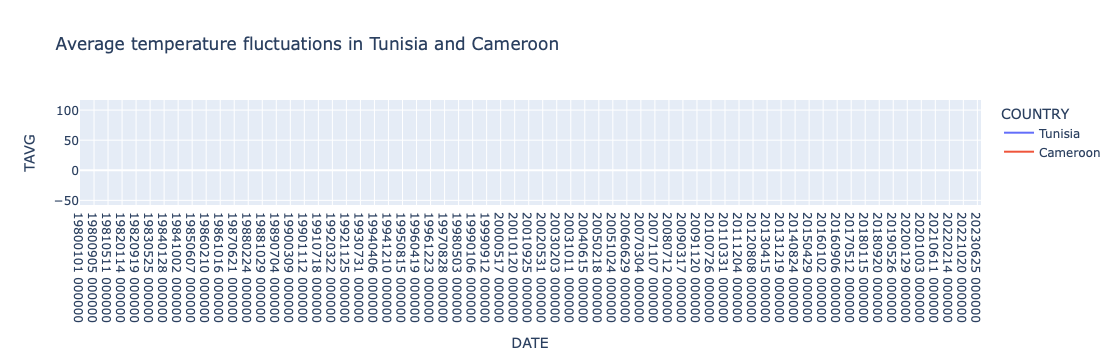

<Figure size 1000x500 with 0 Axes>

In [35]:
plt.figure(figsize=(10,5))
fig = px.line(temp_df, x='DATE', y='TAVG', color='COUNTRY', title="Average temperature fluctuations in Tunisia and Cameroon")
fig.show()

In [39]:
avg_temp_per_country = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

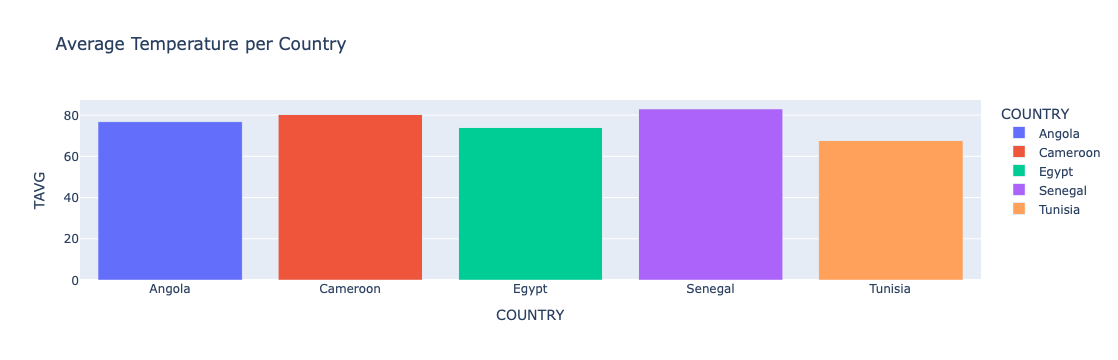

In [40]:
fig = px.bar(avg_temp_per_country, x='COUNTRY', y='TAVG', title='Average Temperature per Country', color='COUNTRY')
fig.show()